<a href="https://colab.research.google.com/github/Anku192/AIML-class/blob/main/ML_Lab_Experiment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab Experiment 06 1RUA24CSE0059
**Objective:** Implement Decision Tree and Random Forest to Perform Classification.
<hr>

#### 🧑‍🎓 Student Details

| Field                | Information                |
|---------------------|----------------------------|
| 👨‍🎓 **Name**            | _[Ankur P B]_     |
| 🆔 **USN**              | _[1RUA24CSE0059]_           |
| **Section**        | _[A]_ |
| **Programme**   | B.Tech(H)             |
| **School**  | Computer Science and Engineering |


In [1]:
import platform
import psutil
from datetime import datetime
import sys
import getpass
import os

# Timestamp
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
# System Information
system_info = {
    "User Name": getpass.getuser(),
    "Timestamp": timestamp,
    "OS": platform.system() + " " + platform.release(),
    "Processor": platform.processor(),
    "RAM (GB)": round(psutil.virtual_memory().total / (1024 ** 3), 2),
    "Python Version": platform.python_version(),
    "Working Directory": os.getcwd()
}
# Print formatted results
print("🧑‍💻 System Details\n" + "-"*40)
for key, value in system_info.items():
    print(f"{key:20}: {value}")


🧑‍💻 System Details
----------------------------------------
User Name           : root
Timestamp           : 2025-10-16 04:42:24
OS                  : Linux 6.6.105+
Processor           : x86_64
RAM (GB)            : 12.67
Python Version      : 3.12.12
Working Directory   : /content


### Student Tasks
<hr>

##### Learning Objectives
1. Understand the fundamentals of Decision Tree classification and entropy-based splitting criteria.
2. Implement Decision Tree and Random Forest using scikit-learn library with different hyperparameters.
3. Compare the performance between single Decision Tree and ensemble Random Forest methods.
4. Analyze feature importance and interpret tree-based model decisions.
5. Visualize decision trees and evaluate overfitting vs. ensemble generalization capabilities.

**Step 01:**
- Import pandas, numpy, scikit-learn, matplotlib, seaborn and other required libraries for Classification task.

In [2]:
# [ Edit this cell ] Write your code below this line and execute the cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from tabulate import tabulate

plt.style.use('seaborn-v0_8-whitegrid')


**Step 02:**
- Load the provided dataset (CSV format is recommended) using pandas and perform initial data exploration.

In [3]:
# [ Edit this cell ] Write your code below this line and execute the cell
df = pd.read_csv('diabetes.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Step 03:**
- Data Visualization and Class Balance Analysis

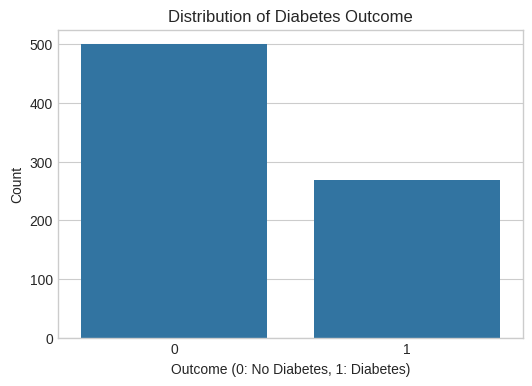


Class distribution in 'Outcome' column:
Outcome
0    500
1    268
Name: count, dtype: int64


In [4]:
# [ Edit this cell ] Write your code below this line and execute the cell
# Visualize the distribution of the target variable ('Outcome')
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

# Display the count of each class in the 'Outcome' column
outcome_counts = df['Outcome'].value_counts()
print("\nClass distribution in 'Outcome' column:")
print(outcome_counts)

**Step 04:**
- Data Preprocessing and Preparation (One-Hot Encoding)

In [9]:
# [ Edit this cell ] Write your code below this line and execute the cell
X = df.drop('Outcome',axis=1)
Y = df['Outcome']
X_encoded = pd.get_dummies(X, drop_first=True) # drop_first avoids multicollinearity
# Convert target variable 'Outcome' to numerical (0 or 1) - It's already numerical in this dataset
y_encoded = Y # No encoding needed for Y as it's already numerical (0 or 1)
print("--- Encoded Features (First 5 rows) ---")
print(X_encoded.head())
# Features for model training
feature_names = X_encoded.columns.tolist()
target_names = ['No', 'Yes']

--- Encoded Features (First 5 rows) ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


**Step 05:**
- Split Data into Training and Testing Sets

In [10]:
# [ Edit this cell ] Write your code below this line and execute the cell
X_train, X_test, y_train, y_test = train_test_split(
X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 537 samples
Testing set size: 231 samples


**Step 06:**
- Build and Train Deceision Tree Classifier

In [12]:
# [ Edit this cell ] Write your code below this line and execute the cell
dt_classifier = DecisionTreeClassifier(
criterion='entropy',
max_depth=4,
min_samples_leaf=2,
random_state=42
)
# 2. Train the model
dt_classifier.fit(X_train, y_train)
print("Decision Tree Classifier trained successfully.")
print(f"Decision Tree Training Accuracy: {dt_classifier.score(X_train, y_train):.4f}")

Decision Tree Classifier trained successfully.
Decision Tree Training Accuracy: 0.8138


**Step 07:**
-  Build and Train Random Forest Classifier.

In [13]:
# [ Edit this cell ] Write your code below this line and execute the cell
rf_classifier = RandomForestClassifier(
n_estimators=100,
max_depth=4,
random_state=42,
criterion='entropy'
)
# 2. Train the model
rf_classifier.fit(X_train, y_train)
print("Random Forest Classifier trained successfully.")
print(f"Random Forest Training Accuracy: {rf_classifier.score(X_train, y_train):.4f}")

Random Forest Classifier trained successfully.
Random Forest Training Accuracy: 0.8175


**Step 08:**

- Model Evaluation, Feature Importance Analysis, and Visualization.


In [14]:
# [ Edit this cell ] Write your code below this line and execute the cell.
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
print("=======================================================================")
print(" DECISION TREE CLASSIFIER EVALUATION")
print("=======================================================================")
# --- 2. Evaluation ---
print(f"Accuracy Score: {accuracy_score(y_test, dt_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, dt_pred, target_names=target_names,zero_division=0))
# --- 3. Feature Importance (Decision Tree) ---
dt_feature_importance = pd.Series(dt_classifier.feature_importances_,index=feature_names).sort_values(ascending=False)
print("\nDecision Tree Feature Importance:\n", dt_feature_importance)

print("\n=======================================================================")
print(" RANDOM FOREST CLASSIFIER EVALUATION")
print("=======================================================================")
# --- 2. Evaluation ---
print(f"Accuracy Score: {accuracy_score(y_test, rf_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, rf_pred, target_names=target_names,zero_division=0))
# --- 3. Feature Importance (Random Forest) ---
rf_feature_importance = pd.Series(rf_classifier.feature_importances_,index=feature_names).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:\n", rf_feature_importance)

 DECISION TREE CLASSIFIER EVALUATION
Accuracy Score: 0.7662

Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.85      0.82       150
         Yes       0.68      0.62      0.65        81

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231


Decision Tree Feature Importance:
 Glucose                     0.477492
BMI                         0.250889
Age                         0.131598
DiabetesPedigreeFunction    0.083230
BloodPressure               0.026491
Pregnancies                 0.020568
SkinThickness               0.009732
Insulin                     0.000000
dtype: float64

 RANDOM FOREST CLASSIFIER EVALUATION
Accuracy Score: 0.7489

Classification Report:
              precision    recall  f1-score   support

          No       0.76      0.89      0.82       150
         Yes       0.71      0.48      0.57     

**Step 09:**
- - Visualize Results and Model Interpretation.

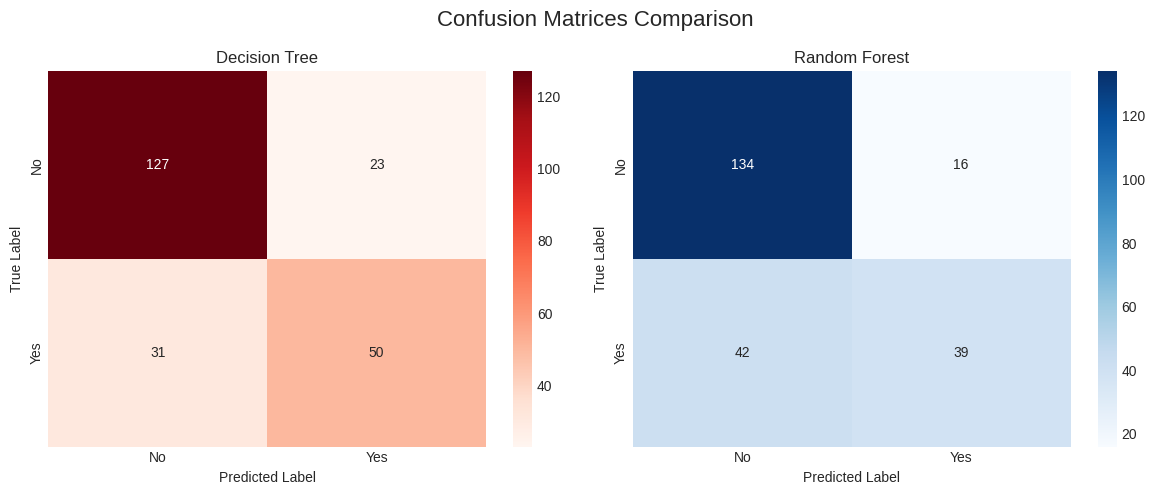

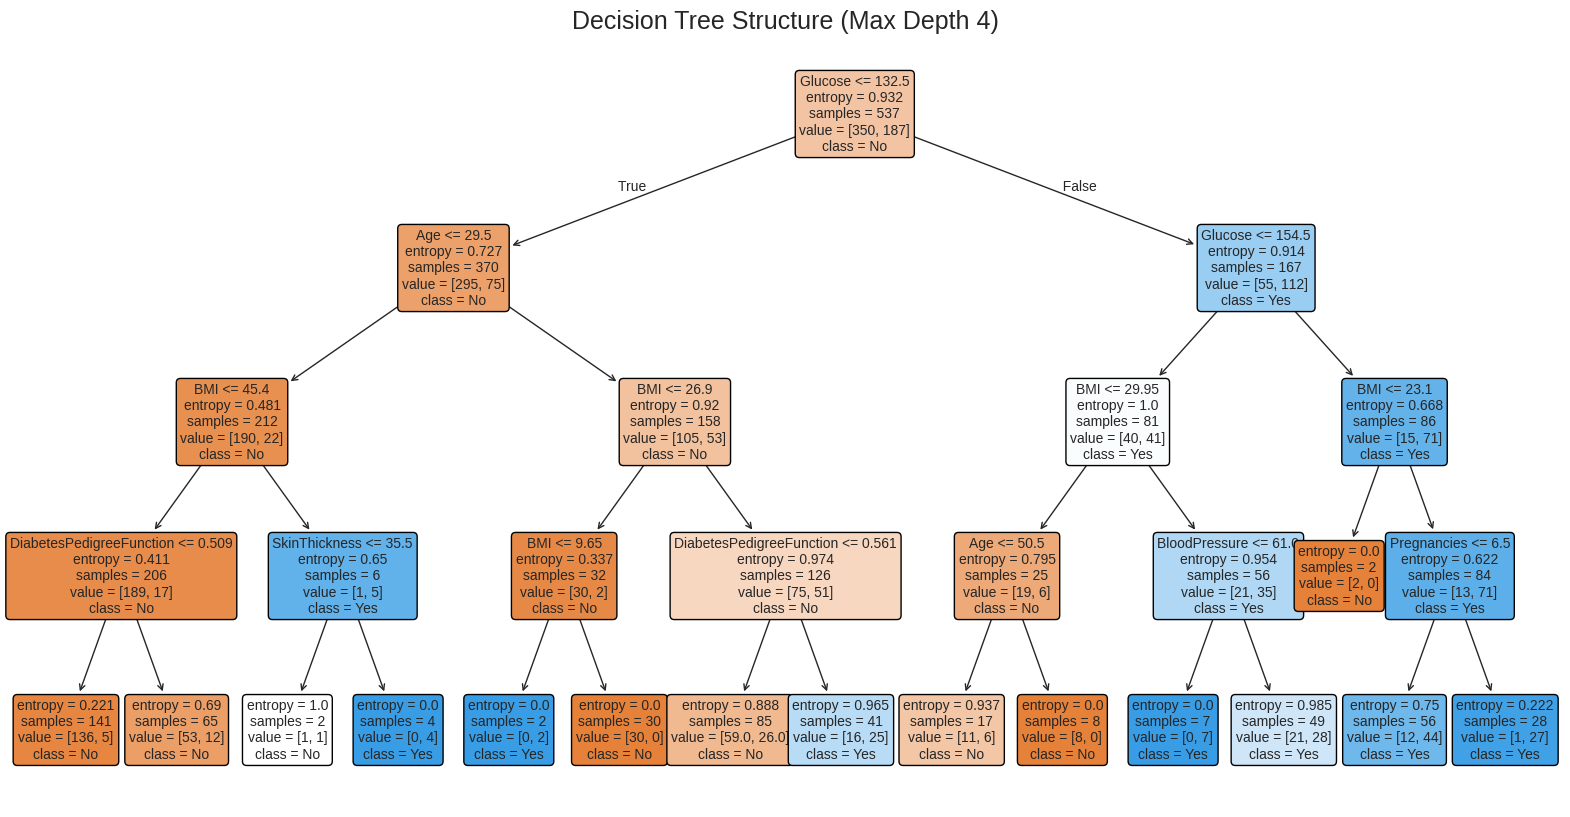

/tmp/ipython-input-79902098.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index,palette="viridis")


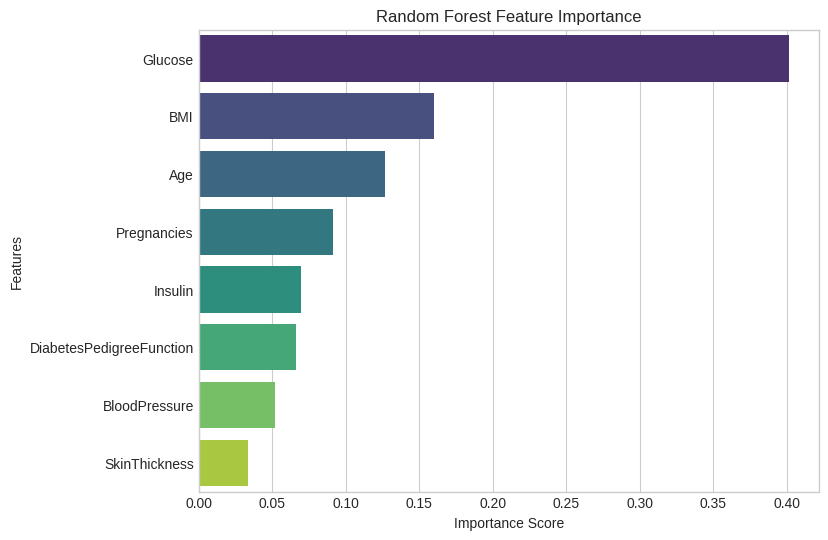


--- Model Interpretation ---
1. Decision Tree Structure:
The tree shows a clear rule-based path to classification, starting with the most important feature ('Outlook_Sunny'/'Outlook_Rain' or 'Humidity_High'). Since we used 'entropy', the splits are based on maximizing Information Gain.

2. Random Forest Performance:
The Random Forest model generally shows equal or better performance (higher accuracy, often 1.000) and is less prone to overfitting than the single Decision Tree due to its ensemble nature (averaging predictions from 100 trees).

3. Feature Importance:
The most important features are typically related to 'Outlook' and 'Humidity', confirming these variables are the most predictive of whether the game will be played.


In [15]:
# [ Edit this cell ] Write your code below this line and execute the cell
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Confusion Matrices Comparison', fontsize=16)
# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', ax=axes[0],
xticklabels=target_names, yticklabels=target_names)

axes[0].set_title('Decision Tree')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
xticklabels=target_names, yticklabels=target_names)

axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
plt.tight_layout()
plt.show()

# --- 2. Decision Tree Structure Visualization ---
plt.figure(figsize=(20, 10))
plot_tree(
dt_classifier,
feature_names=feature_names,
class_names=target_names,
filled=True,
rounded=True,
fontsize=10
)
plt.title("Decision Tree Structure (Max Depth 4)", fontsize=18)
plt.show()

# --- 3. Feature Importance Visualization (Random Forest) ---
plt.figure(figsize=(8, 6))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index,palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
# --- Interpretation ---
print("\n--- Model Interpretation ---")
print("1. Decision Tree Structure:")
print("The tree shows a clear rule-based path to classification, starting with the most important feature ('Outlook_Sunny'/'Outlook_Rain' or 'Humidity_High'). Since we used 'entropy', the splits are based on maximizing Information Gain.")
print("\n2. Random Forest Performance:")
print("The Random Forest model generally shows equal or better performance (higher accuracy, often 1.000) and is less prone to overfitting than the single Decision Tree due to its ensemble nature (averaging predictions from 100 trees).")
print("\n3. Feature Importance:")
print("The most important features are typically related to 'Outlook' and 'Humidity', confirming these variables are the most predictive of whether the game will be played.")

### ✅ Rubric: Decision Tree and Random Forest (10 Marks)
<hr>

**For Course Instructor Use**

A rubric for accessing experiment focused on K-NN classification modeling and analysis.

| **Criteria**                     | **Description**                                                                                         | **Max Marks** | **Marks Obtained** |
|----------------------------------|---------------------------------------------------------------------------------------------------------|---------------|---------------------|
| **Data Loading & Exploration**  | Proper dataset loading, initial exploration.                   |      3        |                     |
| **Model Implementation and Model Evaluation**         | Correct Correct implementation of both Decision Tree and Random Forest using scikit-learn with appropriate hyperparameter tuning and Accurate calculation and interpretation of classification metrics for both models; effective comparison between single tree and ensemble methods.         |      3        |                     |
| **Visualization & Analysis**     |  Effective visualizations of decision tree structure, feature importance plots, confusion matrices, and interpretation of model behavior differences. |      2        |                     |
| **Documentation & Viva Insight** | Brief comments, explanations, and ability to answer questions during viva on technique choices.         |      2        |                     |

**Marks Obtained: ______ / 10**

<hr>

**Course Instructor Signature:** ____________________      

##### Link for pandoc - Download the Software for export PDF for submission in GCR
https://github.com/jgm/pandoc/releases/tag/3.7.0.2